In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm

In [2]:
pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset


In [3]:
ks = pd.read_excel("Kickstarter_Dataset (1).xlsx")
ks.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed


In [4]:
ks.info()
#USD missing Name Missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [5]:
ks.isnull().sum()

ID                 0
name              35
main_category      0
category           0
country            0
currency           0
launched           0
deadline           0
length_days        0
goal               0
pledged            0
usd pledged      210
backers            0
state              0
dtype: int64

In [6]:
ks.loc[ks.isnull().any(axis = 1)]

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state
6095,621230536,NaN,Fashion,Apparel,AU,AUD,2016-11-06 02:33:11,2016-11-20 03:33:11,14,5000.0,5772.00,568.884114,41,successful
6410,723970236,NaN,Fashion,Apparel,DE,EUR,2015-11-19 22:37:30,2015-12-19 22:37:30,30,3300.0,8.76,9.314809,1,failed
6982,587878217,Airport32,Fashion,Apparel,"N,""0",EUR,2016-03-16 18:49:04,2016-04-30 14:02:00,44,31500.0,229.50,NaN,0,failed
8544,179907929,NaN,Fashion,Apparel,US,USD,2014-09-11 07:02:50,2014-10-11 07:02:50,30,55000.0,10.00,10.000000,2,failed
10501,941180344,NaN,Fashion,Apparel,US,USD,2015-06-02 19:00:38,2015-07-03 18:59:00,30,20000.0,82732.00,82732.000000,1085,successful
13553,2127145871,NaN,Technology,Apps,US,USD,2015-07-10 20:10:20,2015-08-24 20:10:20,45,40000.0,0.00,0.000000,0,failed
17217,1344855974,NaN,Art,Art,US,USD,2016-10-18 16:55:00,2016-11-18 06:00:00,30,1342.0,1588.00,356.000000,69,successful
30603,1506346556,NaN,Design,Civic Design,US,USD,2011-06-15 22:09:47,2011-07-15 22:09:47,30,25000.0,41647.63,41647.630000,1203,successful
30723,922012277,NaN,Design,Civic Design,US,USD,2013-06-12 16:30:08,2013-07-12 16:30:08,30,250000.0,273114.92,273114.920000,3175,successful
37020,1231345247,NaN,Comics,Comics,US,USD,2012-06-15 22:39:48,2012-07-15 23:45:00,30,5000.0,5305.00,5305.000000,71,successful


In [7]:
ks.dropna(subset=["usd pledged"], inplace = True)

In [8]:
ks["name"].fillna("Unknow Project Name", inplace = True)

In [9]:
ks.loc[ks.isnull().any(axis = 1)]

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state


In [10]:
ks.loc[ks.duplicated()]

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state


In [11]:
ks.drop(columns = "ID", inplace = True)

In [12]:
ks.drop(columns = "deadline", inplace = True)

In [13]:
ks.drop(columns = "launched", inplace = True)

In [14]:
ks["US Funding %"] = (ks["usd pledged"]/ks["goal"])*100

In [15]:
ks["pct_funded"] = (ks["pledged"]/ks["goal"])*100

In [16]:
ks["US % of Total Fund"] = (ks["usd pledged"]/ks["pledged"])*100

In [17]:
ks.tail()

,name,main_category,category,country,currency,length_days,goal,pledged,usd pledged,backers,state,US Funding %,pct_funded,US % of Total Fund
281851,Zelva - Literary Movement,Publishing,Zines,US,USD,30,1000.0,403.00,403.00,5,failed,40.300000,40.300000,100.0
281852,"Multi Entry - Telling the Stories of Young, Cr...",Publishing,Zines,US,USD,30,10000.0,12810.54,12810.54,236,successful,128.105400,128.105400,100.0
281853,Help Fund Love U Magazine & Support Body-Posit...,Publishing,Zines,US,USD,30,50000.0,209.00,209.00,8,failed,0.418000,0.418000,100.0
281854,APPALOOSA! Mobile App Prototyping Kit for Curi...,Publishing,Zines,US,USD,46,5000.0,5464.00,5464.00,116,successful,109.280000,109.280000,100.0
281855,Fathers: Balancing Family & Art,Publishing,Zines,US,USD,24,150.0,178.00,178.00,26,successful,118.666667,118.666667,100.0


In [18]:
ks["main_category"].value_counts()

Film & Video    51108
Music           40868
Publishing      30254
Games           22429
Art             21805
Technology      21444
Design          20032
Food            18899
Fashion         15839
Theater          9340
Photography      8668
Comics           7918
Crafts           6310
Journalism       3537
Dance            3195
Name: main_category, dtype: int64

In [19]:
ks["category"].value_counts()

Product Design        14539
Documentary           13371
Shorts                10786
Music                 10744
Food                   9545
Tabletop Games         8830
Video Games            7871
Film & Video           7813
Fiction                7277
Fashion                6997
Nonfiction             6581
Theater                6476
Art                    6243
Rock                   5852
Children's Books       5148
Indie Rock             5048
Photography            5041
Webseries              4772
Technology             4722
Apparel                4657
Narrative Film         4410
Comics                 4245
Publishing             4128
Apps                   3984
Country & Folk         3821
Web                    3480
Crafts                 3410
Hip-Hop                3062
Design                 2908
Pop                    2763
Hardware               2670
Painting               2641
Public Art             2624
Classical Music        2216
Mixed Media            2187
Games               

In [20]:
ks["country"].value_counts()

US    229826
GB     23877
CA      9912
AU      5195
DE      2131
NL      1873
FR      1559
IT      1394
ES      1090
SE      1066
NZ       993
DK       672
IE       473
NO       430
CH       389
BE       329
AT       283
SG        70
HK        47
LU        33
MX         4
Name: country, dtype: int64

In [21]:
ks["currency"].value_counts()

USD    229826
GBP     23877
CAD      9912
EUR      9165
AUD      5195
SEK      1066
NZD       993
DKK       672
NOK       430
CHF       389
SGD        70
HKD        47
MXN         4
Name: currency, dtype: int64

In [22]:
ks["state"].value_counts()

failed        168503
successful    113143
Name: state, dtype: int64

In [27]:
ks.to_excel("Kickstarter Dataset Cleaned.xlsx")

In [87]:
ks2.to_excel("Kickstarter Dataset Cleanedwithout outliers.xlsx")

In [55]:
ks["Almost Funded"] = np.where(((ks["goal"]) - (ks["pledged"]) <= 9000), "Almost", "Not Close")

In [56]:
ks["Almost Funded"].value_counts()

Almost       210224
Not Close     71422
Name: Almost Funded, dtype: int64

In [57]:
pd.crosstab(ks["Almost Funded"], ks["main_category"])

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
Almost Funded,,,,,,,,,,,,,,,
Almost,18593,7007,5310,2926,13209,11446,36755,11263,15958,2540,35451,7199,24006,10284,8277
Not Close,3212,911,1000,269,6823,4393,14353,7636,6471,997,5417,1469,6248,11160,1063


In [22]:
ks2 = ks.copy()
print(ks2.shape)

(281646, 14)


In [23]:
ks2["pledge_zscore"] = np.abs(stats.zscore(ks2["pledged"]))

In [24]:
pledge_outliers = ks2.loc[ks2["pledge_zscore"] > 3].index
print(pledge_outliers)

Int64Index([    17,     60,    109,    152,    157,    172,    191,    204,
               211,    212,
            ...
            269567, 269590, 269591, 269611, 272640, 273284, 273394, 274465,
            276407, 280727],
           dtype='int64', length=1090)


In [25]:
ks2 = ks2.drop(pledge_outliers)
print(ks2.shape)

(280556, 15)


In [26]:
ks2["USpledge_zscore"] = np.abs(stats.zscore(ks2["usd pledged"]))

In [27]:
uspledge_outliers = ks2.loc[ks2["USpledge_zscore"] > 3].index
print(uspledge_outliers)

Int64Index([     8,     20,     26,     27,     30,     35,     36,     79,
                83,     92,
            ...
            277223, 277487, 277643, 277657, 277734, 277808, 277877, 278144,
            280173, 280925],
           dtype='int64', length=4763)


In [28]:
ks2 = ks2.drop(uspledge_outliers)
print(ks2.shape)

(275793, 16)


In [29]:
ks2["goal_zscore"] = np.abs(stats.zscore(ks2["goal"]))

In [30]:
goal_outliers = ks2.loc[ks2["goal_zscore"] > 3].index
print(goal_outliers)

Int64Index([   809,   2820,   3033,   3086,   3101,   3105,   3250,   3813,
              5090,   5349,
            ...
            270059, 270213, 270621, 272078, 272180, 272847, 272955, 278044,
            278047, 279605],
           dtype='int64', length=276)


In [31]:
ks2 = ks2.drop(goal_outliers)
print(ks2.shape)

(275517, 17)


In [32]:
ks2["backers_zscore"] = np.abs(stats.zscore(ks2["backers"]))

In [33]:
backers_outliers = ks2.loc[ks2["backers_zscore"] > 3].index
print(backers_outliers)

Int64Index([    53,     80,     90,     99,    138,    149,    206,    340,
               373,    379,
            ...
            280450, 280568, 280760, 280830, 281012, 281100, 281730, 281759,
            281796, 281844],
           dtype='int64', length=4585)


In [34]:
ks2 = ks2.drop(backers_outliers)
print(ks2.shape)

(270932, 18)


In [35]:
average_goal = ks2["goal"].mean()

In [36]:
average_pledged = ks2["pledged"].mean()

In [37]:
average_uspledge = ks2["usd pledged"].mean()

In [38]:
average_backers = ks2["backers"].mean()

In [39]:
print(f"Averages are\n Goal: {average_goal}\n Pledged: {average_pledged}\n US Pledge: {average_uspledge}\n Backers: {average_backers}"  )

Averages are
 Goal: 21047.663082175575
 Pledged: 3678.156707550274
 US Pledge: 3394.4264747571333
 Backers: 45.57625898749502


In [40]:
ks3 = ks2.copy()

In [41]:
ks3.drop(columns = "USpledge_zscore", inplace = True)

In [42]:
ks3.drop(columns = "goal_zscore", inplace = True)

In [43]:
ks3.drop(columns = "backers_zscore", inplace = True)

In [44]:
ks3["Funds_Needed"] = ks3["goal"] - ks3["pledged"]

In [45]:
def status(f):
    if f <= 0:
        return "5"
    elif f <= 1500:
        return "1"
    elif f > 1500 :
        return "0"
    else:
        return "Error"
    
ks3["Almost_Funded2"] = ks3["Funds_Needed"].apply(status)

In [46]:
ks3.head(25)

,name,main_category,category,country,currency,length_days,goal,pledged,usd pledged,backers,state,US Funding %,pct_funded,US % of Total Fund,pledge_zscore,Funds_Needed,Almost_Funded2
0,French Cuisine,Food,Cookbooks,US,USD,29,13730.0,3984.00,3984.000000,46,failed,29.016752,29.016752,100.000000,0.058018,9746.00,0
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,35,75000.0,7386.00,1561.784015,31,failed,2.082379,9.848000,21.145194,0.021852,67614.00,0
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,30,15000.0,3834.00,4152.402045,46,failed,27.682680,25.560000,108.304696,0.059613,11166.00,0
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,30,20000.0,18.00,19.435528,6,failed,0.097178,0.090000,107.975153,0.100180,19982.00,0
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,40,20000.0,2598.00,2908.076574,29,failed,14.540383,12.990000,111.935203,0.072752,17402.00,0
5,Dough Cannon - food extruder for 3D Printing,Technology,3D Printing,AU,AUD,30,85000.0,587.00,432.769894,6,failed,0.509141,0.690588,73.725706,0.094131,84413.00,0
6,Australian 3D Printing Facility!,Technology,3D Printing,AU,AUD,30,5000.0,75.00,65.953316,3,failed,1.319066,1.500000,87.937754,0.099574,4925.00,0
7,X-FORCE 3D Printer,Technology,3D Printing,AU,AUD,45,50000.0,10458.00,9832.237099,13,failed,19.664474,20.916000,94.016419,0.010805,39542.00,0
9,Scott's Affordable FPV Quadcopter,Technology,3D Printing,AU,AUD,30,300.0,20.00,18.764349,2,failed,6.254783,6.666667,93.821744,0.100158,280.00,1
10,& Point : 3D printed Titanium Rings,Technology,3D Printing,AU,AUD,30,5500.0,6119.00,4726.600256,73,successful,85.938186,111.254545,77.244652,0.035321,-619.00,5


In [47]:
ks3["Almost_Funded2"].value_counts()

0    135756
5    103151
1     32025
Name: Almost_Funded2, dtype: int64

In [48]:
pd.crosstab(ks3["Almost_Funded2"], ks3["main_category"])

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
Almost_Funded2,,,,,,,,,,,,,,,
0,8286,2676,2815,812,10585,9036,24918,11572,10761,2024,14596,4244,16028,14820,2583
1,3822,731,1821,279,1403,2473,4606,2033,2087,634,4559,1511,3925,1390,751
5,9495,4106,1632,2096,5851,3930,20340,4999,6684,810,21319,2835,9830,3297,5927


In [49]:
ks3["usd pledged"].groupby(ks3["Almost_Funded2"]).mean()

Almost_Funded2
0    1275.576707
1     209.759296
5    7171.758110
Name: usd pledged, dtype: float64

In [50]:
ks3["state"].replace(["successful", "failed"], [1, 0], inplace = True)

In [51]:
ks3.corr()

,length_days,goal,pledged,usd pledged,backers,state,US Funding %,pct_funded,US % of Total Fund,pledge_zscore,Funds_Needed
length_days,1.000000,0.068366,-0.001510,0.001736,-0.033124,-0.117273,-0.008126,-0.007406,0.004303,0.013619,0.068457
goal,0.068366,1.000000,0.036486,0.015293,-0.026649,-0.122358,-0.003663,-0.003505,-0.000730,0.066554,0.996306
pledged,-0.001510,0.036486,1.000000,0.842985,0.687038,0.391447,0.011974,0.012676,-0.004045,0.620072,-0.049470
usd pledged,0.001736,0.015293,0.842985,1.000000,0.752756,0.431975,0.013640,0.012406,0.002091,0.321292,-0.057158
backers,-0.033124,-0.026649,0.687038,0.752756,1.000000,0.507846,0.020216,0.019864,-0.002161,0.110023,-0.085676
state,-0.117273,-0.122358,0.391447,0.431975,0.507846,1.000000,0.022167,0.021265,-0.002044,-0.113730,-0.155929
US Funding %,-0.008126,-0.003663,0.011974,0.013640,0.020216,0.022167,1.000000,0.962348,-0.000027,-0.000952,-0.004690
pct_funded,-0.007406,-0.003505,0.012676,0.012406,0.019864,0.021265,0.962348,1.000000,-0.000179,-0.000129,-0.004593
US % of Total Fund,0.004303,-0.000730,-0.004045,0.002091,-0.002161,-0.002044,-0.000027,-0.000179,1.000000,-0.001638,-0.000324
pledge_zscore,0.013619,0.066554,0.620072,0.321292,0.110023,-0.113730,-0.000952,-0.000129,-0.001638,1.000000,0.013230


In [52]:
result = sm.ols("state ~ backers + pledged + C(main_category)", data = ks3).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  state   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     7999.
Date:                Thu, 11 May 2023   Prob (F-statistic):               0.00
Time:                        21:34:59   Log-Likelihood:            -1.3629e+05
No. Observations:              270932   AIC:                         2.726e+05
Df Residuals:                  270915   BIC:                         2.728e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            0.3305      0.003    120.468      0.000       0.325       0.336
C(main_category)[T.Comics]          -0.0297      0.005     -5.508      0.000      -0.040      -0.019
C(main_category)[T.Crafts]          -0.1402      0.006    -24.411      0.000      -0.151      -0.129
C(main_category)[T.Dance]            0.1886      0.008     24.831      0.000       0.174       0.203
C(main_category)[T.Design]          -0.2302      0.004    -56.617      0.000      -0.238      -0.222
C(main_category)[T.Fashion]         -0.1890      0.004    -44.807      0.000      -0.197      -0.181
C(main_category)[T.Film & Video]    -0.0666      0.003    -20.415      0.000      -0.073      -0.060
C(main_category)[T.Food]            -0.1991      0.004    -49.719      0.000      -0.207      -0.191
C(main_category)[T.Games]           -0.2332      0.004    -58.578      0.000      -0.241      -0.225
C(main_category)[T.Journalism]      -0.1813      0.007    -24.765      0.000      -0.196      -0.167
C(main_category)[T.Music]            0.0452      0.003     13.400      0.000       0.039       0.052
C(main_category)[T.Photography]     -0.1070      0.005    -20.960      0.000      -0.117      -0.097
C(main_category)[T.Publishing]      -0.1220      0.004    -34.109      0.000      -0.129      -0.115
C(main_category)[T.Technology]      -0.2913      0.004    -73.617      0.000      -0.299      -0.284
C(main_category)[T.Theater]          0.1682      0.005     33.825      0.000       0.158       0.178
backers                              0.0028   1.38e-05    204.042      0.000       0.003       0.003
pledged                           5.328e-06    1.3e-07     41.079      0.000    5.07e-06    5.58e-06
==============================================================================
Omnibus:                    19396.570   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14805.177
Skew:                           0.479   Prob(JB):                         0.00
Kurtosis:                       2.373   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
ks3["state"].replace([1, 0], ["successful", "failed"], inplace = True)

In [54]:
ks3["pledged"].groupby(ks3["main_category"]).mean()

main_category
Art             2494.662829
Comics          3821.290720
Crafts          1367.066160
Dance           3442.488033
Design          6229.109238
Fashion         3400.832684
Film & Video    4258.124208
Food            3941.801742
Games           4302.819412
Journalism      2101.559054
Music           3469.659877
Photography     2649.253236
Publishing      2512.531279
Technology      4290.653407
Theater         3461.227120
Name: pledged, dtype: float64

In [55]:
ks3["pledged"].groupby(ks3["category"]).mean()

category
3D Printing           10919.863760
Academic               2036.989966
Accessories            4806.023365
Action                 2315.017184
Animals                1933.501980
Animation              3346.068443
Anthologies            5555.708088
Apparel                3109.170740
Apps                   1370.029840
Architecture           4273.906093
Art                    2669.742689
Art Books              5706.993265
Audio                  4424.297828
Bacon                  1280.273168
Blues                  3882.533102
Calendars              2823.811667
Camera Equipment      12119.091768
Candles                 644.247134
Ceramics               4503.959548
Children's Books       2745.723711
Childrenswear          2999.921543
Chiptune               3492.033333
Civic Design           4959.890521
Classical Music        4468.162227
Comedy                 4139.143865
Comic Books            2854.562190
Comics                 3567.987276
Community Gardens      1912.605684
Conceptual 

In [56]:
ks3["pledged"].groupby(ks3["currency"]).mean()

currency
AUD     3329.403147
CAD     3591.009429
CHF     4061.149128
DKK    19838.105601
EUR     2932.931302
GBP     2114.222580
HKD    29168.761905
MXN     4621.250000
NOK    15386.736386
NZD     4187.037081
SEK    19143.585290
SGD     8581.379365
USD     3735.062145
Name: pledged, dtype: float64

In [57]:
ks3["pledged"].groupby(ks3["country"]).mean()

country
AT     3354.431882
AU     3329.403147
BE     2683.015875
CA     3591.009429
CH     4061.149128
DE     2946.605577
DK    19838.105601
ES     2468.414839
FR     4018.210142
GB     2114.222580
HK    29168.761905
IE     2487.987664
IT     2136.183050
LU     1870.021875
MX     4621.250000
NL     3012.045176
NO    15386.736386
NZ     4187.037081
SE    19143.585290
SG     8581.379365
US     3735.062145
Name: pledged, dtype: float64

In [58]:
ks3["pledged"].groupby(ks3["state"]).mean() #######

state
failed        1147.333684
successful    7794.749520
Name: pledged, dtype: float64

In [59]:
ks3["pledged"].groupby(ks3["Almost_Funded2"]).mean()

Almost_Funded2
0    1368.077395
1     211.077138
5    7794.843414
Name: pledged, dtype: float64

In [60]:
ks3["backers"].groupby(ks3["main_category"]).mean()

main_category
Art             33.917373
Comics          79.772661
Crafts          22.212029
Dance           42.570756
Design          68.866024
Fashion         33.614418
Film & Video    42.964644
Food            41.176575
Games           78.590365
Journalism      25.895329
Music           46.897218
Photography     32.709197
Publishing      38.275627
Technology      37.872815
Theater         43.465932
Name: backers, dtype: float64

In [61]:
ks3["backers"].groupby(ks3["category"]).mean()

category
3D Printing            60.602180
Academic               24.372650
Accessories            46.763126
Action                 17.807453
Animals                28.619289
Animation              38.907626
Anthologies           118.178022
Apparel                28.224566
Apps                   13.736375
Architecture           32.582205
Art                    35.872998
Art Books              76.962468
Audio                  29.535581
Bacon                  18.956522
Blues                  43.529412
Calendars              54.095960
Camera Equipment       79.325967
Candles                13.941368
Ceramics               43.512563
Children's Books       42.304502
Childrenswear          30.347267
Chiptune               84.518519
Civic Design           49.914692
Classical Music        49.339973
Comedy                 44.348465
Comic Books            72.497254
Comics                 74.021997
Community Gardens      21.901709
Conceptual Art         26.002433
Cookbooks              45.680556
C

In [62]:
ks3["backers"].groupby(ks3["country"]).mean()

country
AT    28.601476
AU    35.835292
BE    28.878125
CA    38.218704
CH    29.820163
DE    36.060383
DK    36.145086
ES    37.458254
FR    44.702429
GB    40.932031
HK    44.857143
IE    38.467249
IT    27.090909
LU    33.156250
MX     9.250000
NL    32.371696
NO    27.583133
NZ    40.123188
SE    34.611000
SG    58.285714
US    47.176155
Name: backers, dtype: float64

In [63]:
ks3["backers"].groupby(ks3["Almost_Funded2"]).mean()

Almost_Funded2
0    16.619634
1     5.619266
5    96.091119
Name: backers, dtype: float64

In [64]:
ks3["backers"].groupby(ks3["state"]).mean()

state
failed        14.520139
successful    96.091604
Name: backers, dtype: float64

In [65]:
pd.crosstab(ks3["state"], ks3["main_category"])

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
failed,12106,3407,4636,1091,11988,11509,29523,13605,12848,2658,19157,5755,19954,16210,3335
successful,9497,4106,1632,2096,5851,3930,20341,4999,6684,810,21317,2835,9829,3297,5926


In [66]:
pd.crosstab(ks3["Almost_Funded2"], ks3["main_category"])

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
Almost_Funded2,,,,,,,,,,,,,,,
0,8286,2676,2815,812,10585,9036,24918,11572,10761,2024,14596,4244,16028,14820,2583
1,3822,731,1821,279,1403,2473,4606,2033,2087,634,4559,1511,3925,1390,751
5,9495,4106,1632,2096,5851,3930,20340,4999,6684,810,21319,2835,9830,3297,5927


In [67]:
pd.crosstab(ks3["state"], ks3["category"])

category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,Art,Art Books,Audio,Bacon,Blues,Calendars,Camera Equipment,Candles,Ceramics,Children's Books,Childrenswear,Chiptune,Civic Design,Classical Music,Comedy,Comic Books,Comics,Community Gardens,Conceptual Art,Cookbooks,Country & Folk,Couture,Crafts,Crochet,DIY,DIY Electronics,Dance,Design,Digital Art,Documentary,Drama,Drinks,Electronic Music,Embroidery,Events,Experimental,Fabrication Tools,Faith,Family,Fantasy,Farmer's Markets,Farms,Fashion,Festivals,Fiction,Film & Video,Fine Art,Flight,Food,Food Trucks,Footwear,Gadgets,Games,Gaming Hardware,Glass,Graphic Design,Graphic Novels,Hardware,Hip-Hop,Horror,Illustration,Immersive,Indie Rock,Installations,Interactive Design,Jazz,Jewelry,Journalism,Kids,Knitting,Latin,Letterpress,Literary Journals,Live Games,Makerspaces,Metal,Mixed Media,Mobile Games,Movie Theaters,Music,Music Videos,Musical,Narrative Film,Nature,Nonfiction,Painting,People,Performance Art,Performances,Periodicals,Pet Fashion,Photo,Photobooks,Photography,Places,Playing Cards,Plays,Poetry,Pop,Pottery,Print,Printing,Product Design,Public Art,Publishing,Punk,Puzzles,Quilts,R&B,Radio & Podcasts,Ready-to-wear,Residencies,Restaurants,Robots,Rock,Romance,Science Fiction,Sculpture,Shorts,Small Batch,Software,Sound,Space Exploration,Spaces,Stationery,Tabletop Games,Taxidermy,Technology,Television,Textiles,Theater,Thrillers,Translations,Typography,Vegan,Video,Video Art,Video Games,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
failed,256,441,1141,411,144,1352,154,3630,3691,385,3442,947,198,126,98,112,112,261,109,3271,249,6,136,712,885,635,1970,173,494,273,1287,152,2478,101,650,283,634,1793,671,7881,863,1164,1045,60,467,384,116,446,183,146,263,667,4924,253,5282,5008,324,228,6431,1129,342,1098,1530,153,76,878,502,1589,2514,568,991,100,1605,154,217,583,541,984,109,67,57,11,97,550,97,319,1369,1002,116,5262,319,292,2495,341,4615,1648,629,971,283,579,60,113,623,3240,454,738,404,684,1339,30,383,109,8556,1181,2791,102,88,49,231,388,470,15,1682,205,2574,84,289,854,4465,876,1815,201,124,350,85,3086,5,3604,574,122,2199,340,82,23,232,264,100,5701,408,41,3099,168,3173,613,79,868,430,139
successful,111,144,535,72,53,510,301,921,254,132,2739,998,69,35,89,86,69,46,90,1816,62,21,75,1497,613,1004,2076,61,328,87,2511,38,904,22,136,243,1489,885,291,4944,602,424,592,10,125,285,32,359,52,62,54,192,1905,388,1943,2655,235,42,2952,182,152,308,543,47,33,536,616,575,535,280,1075,134,3397,191,59,990,185,413,102,65,32,23,94,143,60,228,806,109,28,5309,195,388,1774,83,1893,984,177,870,480,428,31,28,427,1764,96,527,659,424,1396,35,126,38,4125,1405,1258,113,66,15,79,330,101,37,314,121,3233,45,202,627,6296,406,266,111,80,206,57,4025,4,702,122,52,4224,145,33,39,120,35,39,1224,125,18,337,202,1520,226,40,834,137,115


In [68]:
pd.crosstab(ks3["Almost_Funded2"], ks3["category"])

category,3D Printing,Academic,Accessories,Action,Animals,Animation,Anthologies,Apparel,Apps,Architecture,Art,Art Books,Audio,Bacon,Blues,Calendars,Camera Equipment,Candles,Ceramics,Children's Books,Childrenswear,Chiptune,Civic Design,Classical Music,Comedy,Comic Books,Comics,Community Gardens,Conceptual Art,Cookbooks,Country & Folk,Couture,Crafts,Crochet,DIY,DIY Electronics,Dance,Design,Digital Art,Documentary,Drama,Drinks,Electronic Music,Embroidery,Events,Experimental,Fabrication Tools,Faith,Family,Fantasy,Farmer's Markets,Farms,Fashion,Festivals,Fiction,Film & Video,Fine Art,Flight,Food,Food Trucks,Footwear,Gadgets,Games,Gaming Hardware,Glass,Graphic Design,Graphic Novels,Hardware,Hip-Hop,Horror,Illustration,Immersive,Indie Rock,Installations,Interactive Design,Jazz,Jewelry,Journalism,Kids,Knitting,Latin,Letterpress,Literary Journals,Live Games,Makerspaces,Metal,Mixed Media,Mobile Games,Movie Theaters,Music,Music Videos,Musical,Narrative Film,Nature,Nonfiction,Painting,People,Performance Art,Performances,Periodicals,Pet Fashion,Photo,Photobooks,Photography,Places,Playing Cards,Plays,Poetry,Pop,Pottery,Print,Printing,Product Design,Public Art,Publishing,Punk,Puzzles,Quilts,R&B,Radio & Podcasts,Ready-to-wear,Residencies,Restaurants,Robots,Rock,Romance,Science Fiction,Sculpture,Shorts,Small Batch,Software,Sound,Space Exploration,Spaces,Stationery,Tabletop Games,Taxidermy,Technology,Television,Textiles,Theater,Thrillers,Translations,Typography,Vegan,Video,Video Art,Video Games,Wearables,Weaving,Web,Webcomics,Webseries,Woodworking,Workshops,World Music,Young Adult,Zines
Almost_Funded2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,230,355,904,347,86,1189,114,2808,3407,341,2304,802,120,56,81,72,105,145,85,2802,200,4,124,556,667,476,1554,130,319,199,1058,127,1498,34,404,237,456,1516,391,7218,703,1013,711,40,339,257,108,372,158,115,212,611,3908,176,4001,4204,238,200,5359,1073,306,1041,1241,127,45,553,426,1506,1838,450,526,77,1151,119,184,508,368,784,94,33,49,9,77,463,86,205,993,783,107,4051,239,243,2295,220,3925,1135,475,699,205,490,46,82,502,2428,295,607,292,444,1093,20,299,70,7849,926,2259,60,67,37,184,239,369,12,1638,170,1844,69,250,648,3266,616,1618,188,105,325,45,2643,3,3337,529,70,1725,276,70,18,199,211,71,4830,391,20,2619,120,2581,412,66,737,324,97
1,26,86,237,64,58,163,40,822,284,44,1140,145,78,70,17,40,7,116,24,469,49,2,12,155,218,159,416,43,175,74,229,25,980,67,246,46,178,277,280,663,160,151,334,20,128,127,8,74,25,31,51,56,1016,77,1280,804,86,28,1072,56,36,57,289,26,31,325,76,83,676,118,465,23,454,35,33,74,173,200,15,34,8,2,20,87,11,114,376,219,9,1211,80,49,200,121,690,513,154,272,78,89,14,31,121,812,159,131,112,240,246,10,84,39,707,255,532,42,21,12,47,149,101,3,44,35,730,15,39,206,1200,260,197,13,19,25,40,443,2,267,45,52,473,64,12,5,33,53,29,871,17,21,480,48,592,201,13,131,106,42
5,111,144,535,72,53,510,301,921,254,132,2737,998,69,35,89,86,69,46,90,1816,62,21,75,1498,613,1004,2076,61,328,87,2511,38,904,22,136,243,1489,885,291,4944,602,424,592,10,125,285,32,359,52,62,54,192,1905,388,1944,2655,235,42,2952,182,152,308,543,47,33,536,616,575,535,280,1075,134,3397,191,59,991,185,413,102,65,32,23,94,143,60,228,806,109,28,5309,195,388,1774,83,1893,984,177,870,480,428,31,28,427,1764,96,527,659,424,1396,35,126,38,4125,1405,1258,113,66,15,79,330,101,37,314,121,3233,45,202,627,6295,406,266,111,80,206,57,4025,4,702,122,52,4225,145,33,39,120,35,39,1224,125,18,337,202,1520,226,40,834,137,115


In [69]:
ks3["goal"].groupby(ks3["state"]).mean() #####

state
failed        30248.026519
successful     6082.511573
Name: goal, dtype: float64

In [70]:
ks3["length_days"].groupby(ks3["state"]).mean()

state
failed        35.165018
successful    32.024905
Name: length_days, dtype: float64

In [71]:
ks3["goal"].groupby(ks3["Almost_Funded2"]).mean() #####

Almost_Funded2
0    37161.436172
1      942.246882
5     6082.559246
Name: goal, dtype: float64

In [72]:
ks3["length_days"].groupby(ks3["Almost_Funded2"]).mean()

Almost_Funded2
0    35.967758
1    31.760937
5    32.025312
Name: length_days, dtype: float64

In [73]:
ks3.head()

,name,main_category,category,country,currency,length_days,goal,pledged,usd pledged,backers,state,US Funding %,pct_funded,US % of Total Fund,pledge_zscore,Funds_Needed,Almost_Funded2
0,French Cuisine,Food,Cookbooks,US,USD,29,13730.0,3984.0,3984.000000,46,failed,29.016752,29.016752,100.000000,0.058018,9746.0,0
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,35,75000.0,7386.0,1561.784015,31,failed,2.082379,9.848000,21.145194,0.021852,67614.0,0
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,30,15000.0,3834.0,4152.402045,46,failed,27.682680,25.560000,108.304696,0.059613,11166.0,0
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,30,20000.0,18.0,19.435528,6,failed,0.097178,0.090000,107.975153,0.100180,19982.0,0
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,40,20000.0,2598.0,2908.076574,29,failed,14.540383,12.990000,111.935203,0.072752,17402.0,0


In [74]:
ks3.corr()

,length_days,goal,pledged,usd pledged,backers,US Funding %,pct_funded,US % of Total Fund,pledge_zscore,Funds_Needed
length_days,1.000000,0.068366,-0.001510,0.001736,-0.033124,-0.008126,-0.007406,0.004303,0.013619,0.068457
goal,0.068366,1.000000,0.036486,0.015293,-0.026649,-0.003663,-0.003505,-0.000730,0.066554,0.996306
pledged,-0.001510,0.036486,1.000000,0.842985,0.687038,0.011974,0.012676,-0.004045,0.620072,-0.049470
usd pledged,0.001736,0.015293,0.842985,1.000000,0.752756,0.013640,0.012406,0.002091,0.321292,-0.057158
backers,-0.033124,-0.026649,0.687038,0.752756,1.000000,0.020216,0.019864,-0.002161,0.110023,-0.085676
US Funding %,-0.008126,-0.003663,0.011974,0.013640,0.020216,1.000000,0.962348,-0.000027,-0.000952,-0.004690
pct_funded,-0.007406,-0.003505,0.012676,0.012406,0.019864,0.962348,1.000000,-0.000179,-0.000129,-0.004593
US % of Total Fund,0.004303,-0.000730,-0.004045,0.002091,-0.002161,-0.000027,-0.000179,1.000000,-0.001638,-0.000324
pledge_zscore,0.013619,0.066554,0.620072,0.321292,0.110023,-0.000952,-0.000129,-0.001638,1.000000,0.013230
Funds_Needed,0.068457,0.996306,-0.049470,-0.057158,-0.085676,-0.004690,-0.004593,-0.000324,0.013230,1.000000


In [75]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, '')

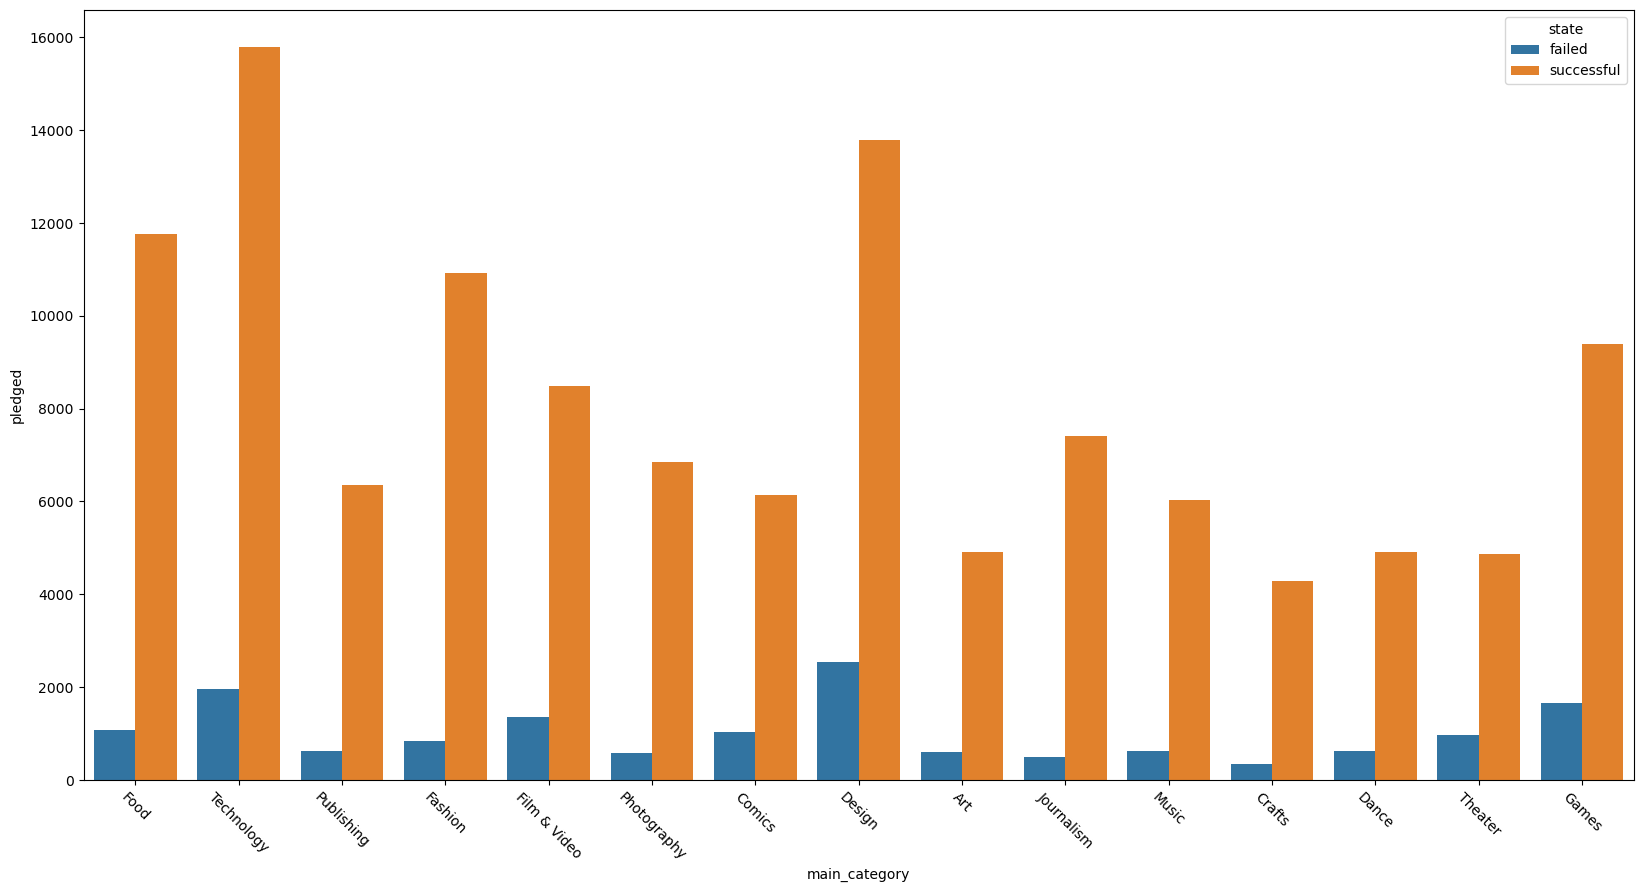

In [83]:
plt.figure(figsize=(20,10))

sns.barplot(data = ks3, x = "main_category", y = "pledged", hue = "state", ci = None)

plt.xticks(rotation = -45)
plt.title('')

<AxesSubplot:xlabel='backers', ylabel='pledged'>

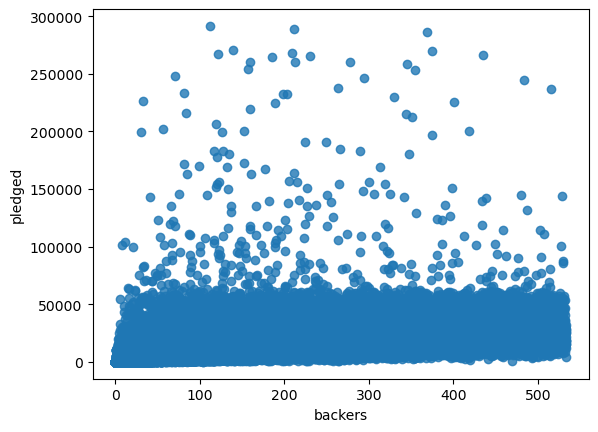

In [89]:
sns.regplot(x = ks3["backers"], y = ks3["pledged"], fit_reg = False)



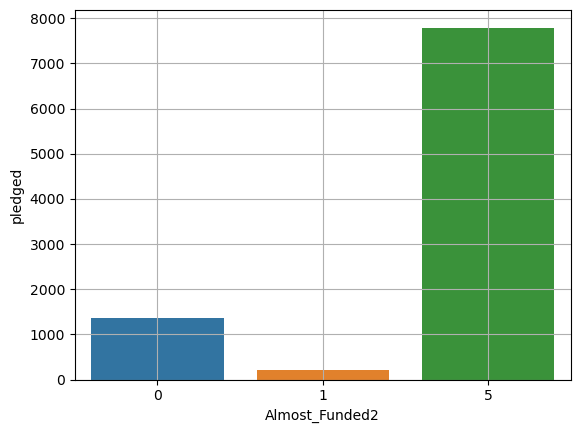

In [78]:
sns.barplot(data = ks3, x = "Almost_Funded2", y = "pledged", ci = None)

plt.title('')
plt.grid()

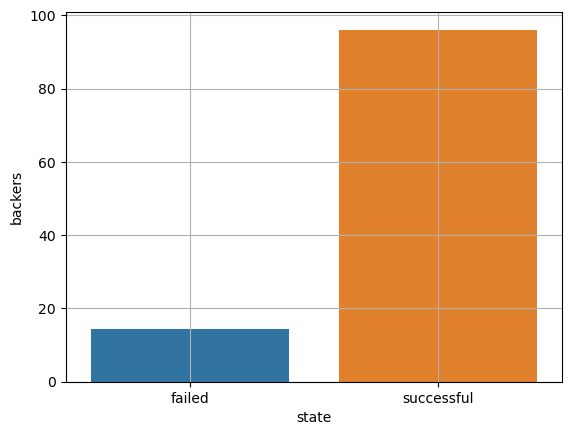

In [81]:
sns.barplot(data = ks3, x = "state", y = "backers", ci = None)

plt.title('')
plt.grid()

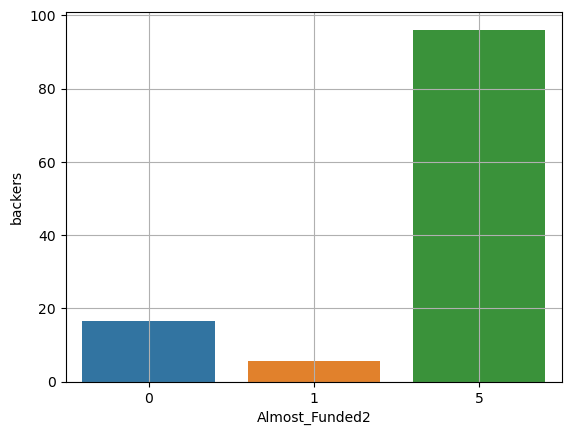

In [82]:
sns.barplot(data = ks3, x = "Almost_Funded2", y = "backers", ci = None)

plt.title('')
plt.grid()

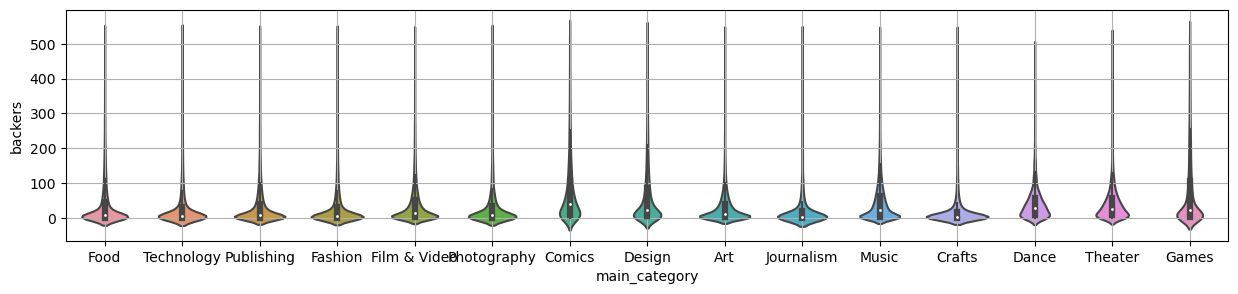

In [80]:
plt.figure(figsize=(15,3))

sns.violinplot(x = ks2["main_category"], y = ks2["backers"])

plt.grid()

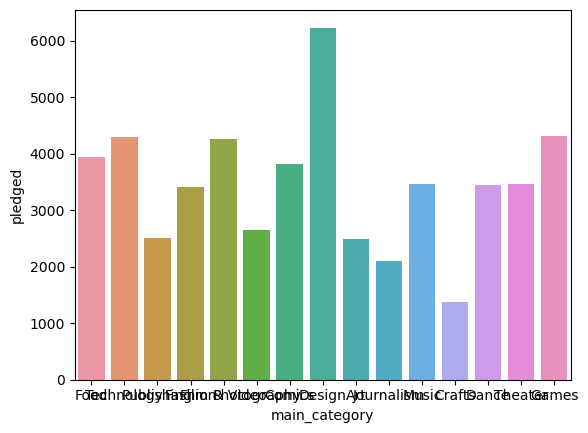

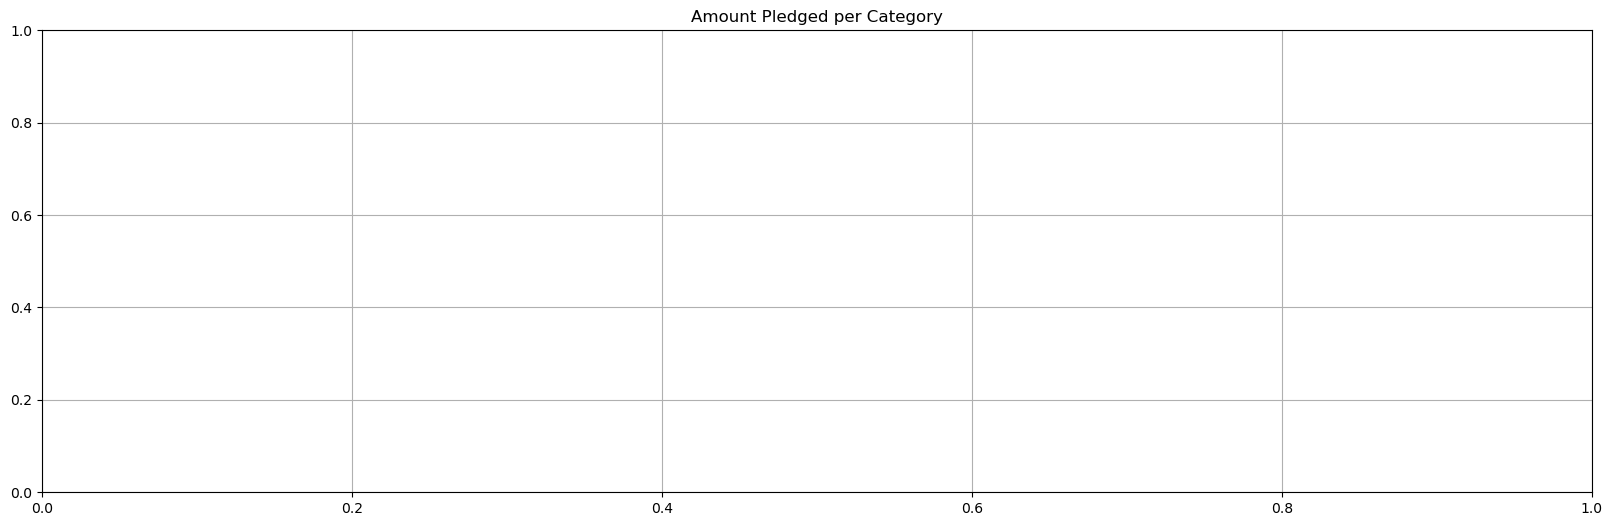

In [86]:
sns.barplot(data = ks2, x = "main_category", y = "pledged", ci = None)
plt.figure(figsize=(20,6))
plt.title('Amount Pledged per Category')
plt.grid()

<AxesSubplot:xlabel='Almost_Funded2', ylabel='Count'>

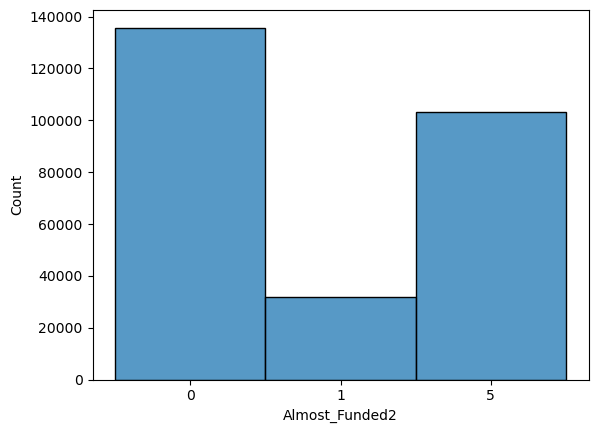

In [88]:

sns.histplot(ks3["Almost_Funded2"], kde = False)